<a href="https://colab.research.google.com/github/Nishil2009/Data-anlaytics-course/blob/main/Copy_of_ML_ASSIGN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Differences between AI, ML, DL, DS

-AI (Artificial Intelligence): Broad field aiming to build intelligent systems that can mimic human reasoning and decision-making.

-ML (Machine Learning): Subset of AI, focuses on algorithms that learn patterns from data to make predictions.

-DL (Deep Learning): Subset of ML, uses neural networks with many layers to learn complex representations (e.g., image recognition, NLP).

-DS (Data Science): Interdisciplinary field that combines statistics, ML, domain knowledge, and data engineering to extract insights.

2. Types of Machine Learning with Examples

Supervised Learning → Trains with labeled data.
Example: Predicting house prices using past sales data.

Unsupervised Learning → Finds hidden patterns in unlabeled data.
Example: Customer segmentation in marketing.

Reinforcement Learning → Learns via trial and error with rewards/punishments.
Example: AlphaGo (game-playing AI).

3. Overfitting, Underfitting & Bias-Variance Tradeoff

Overfitting: Model learns noise + patterns, performs well on training but poorly on test data.

Underfitting: Model too simple, fails to capture data patterns.

Bias-Variance Tradeoff: Balance between model complexity and generalization—low bias often means high variance, and vice versa.

4. What are outliers in a dataset, and list three common techniques for
handling them.

-> Definition: Data points significantly different from most observations.

Techniques:

Z-score/Standard Deviation method

IQR (Interquartile Range) method

Winsorization or Capping

5. Handling Missing Values

Process: Detect → Analyze pattern → Impute or Drop.

Numerical Imputation: Mean/Median replacement.

Categorical Imputation: Mode replacement or “Unknown” category.

6. Create a synthetic imbalanced dataset


In [ ]:
#6.
from sklearn.datasets import make_classification
import numpy as np

# Create synthetic imbalanced dataset
X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=5, n_clusters_per_class=1,
    n_samples=1000, random_state=42
)

# Print class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

Class distribution: {np.int64(0): np.int64(900), np.int64(1): np.int64(100)}


In [ ]:
#7.
import pandas as pd
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])
print(pd.get_dummies(df, columns=['Color']))

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


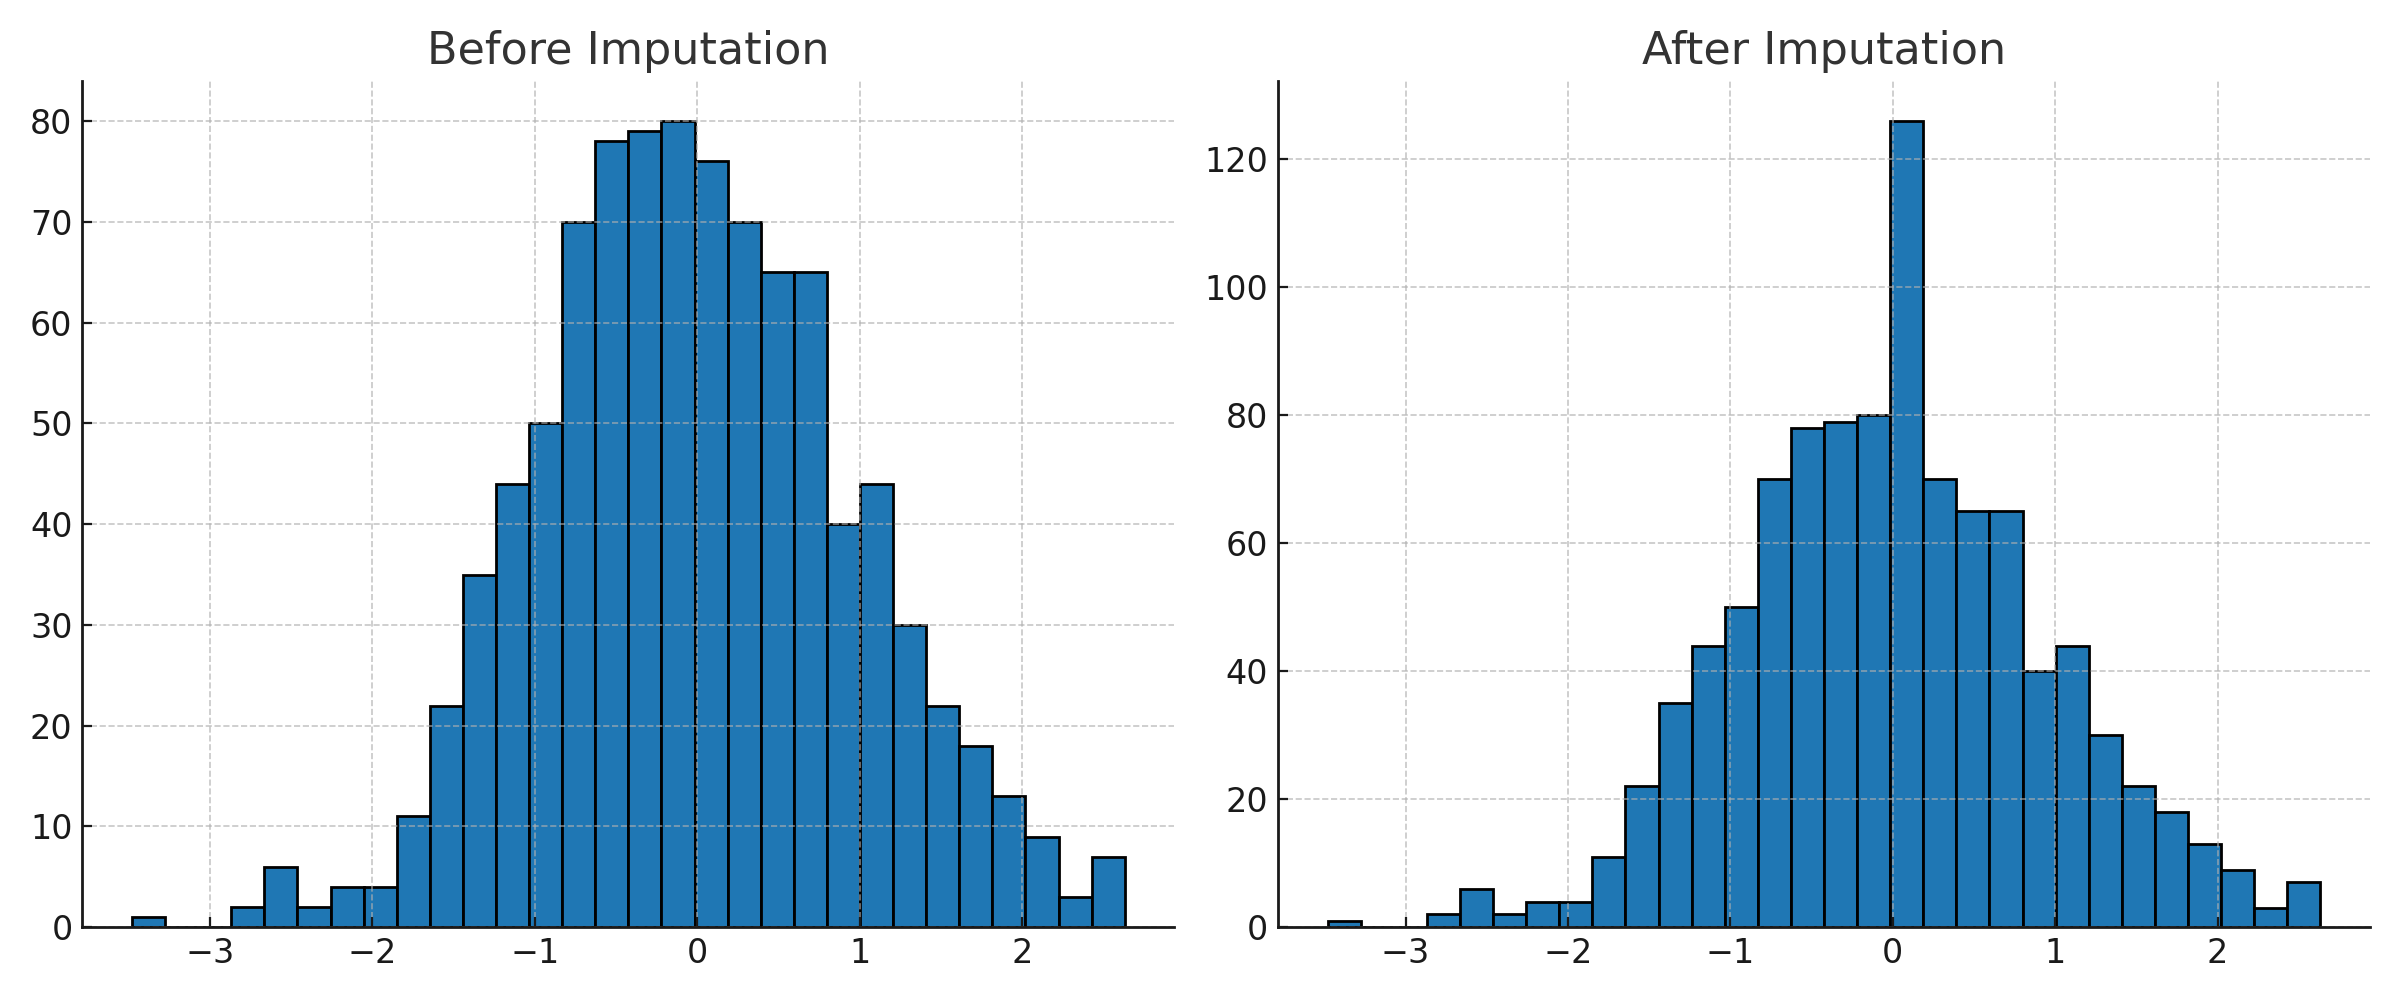

In [ ]:
#9.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2],[5],[10],[15],[20]])
scaler = MinMaxScaler()
print(scaler.fit_transform(data))

[[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


In [ ]:
#10.
#Data Preparation Plan

#Steps before training ML model:
#Handle Missing Ages → Impute mean/median.
#Handle Outliers → Use IQR or capping (e.g., 95th percentile).
#Handle Imbalance → Oversampling (SMOTE) or undersampling.
#Handle Categorical Variables → One-hot encoding for features like payment method.

import pandas as pd
import numpy as np

# Sample dataset
df = pd.DataFrame({
    'Age': [25, np.nan, 40, 30, np.nan, 22],
    'TransactionAmount': [50, 10000, 70, 55, 60, 120],
    'PaymentMethod': ['Card', 'Cash', 'UPI', 'Card', 'Cash', 'UPI'],
    'Fraud': [0, 1, 0, 0, 0, 0]})

print("Original Dataset:")
print(df)

# Step 1: Handle missing values (mean imputation for Age)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Step 2: Handle outliers (cap at 95th percentile)
cap = df['TransactionAmount'].quantile(0.95)
df['TransactionAmount'] = np.where(df['TransactionAmount'] > cap, cap, df['TransactionAmount'])

# Step 3: Encode categorical variables
df = pd.get_dummies(df, columns=['PaymentMethod'])

# Step 4: Check class imbalance
fraud_distribution = df['Fraud'].value_counts().to_dict()

print("\nCleaned Dataset:")
print(df)

print("\nFraud Distribution:", fraud_distribution)


Original Dataset:
    Age  TransactionAmount PaymentMethod  Fraud
0  25.0                 50          Card      0
1   NaN              10000          Cash      1
2  40.0                 70           UPI      0
3  30.0                 55          Card      0
4   NaN                 60          Cash      0
5  22.0                120           UPI      0

Cleaned Dataset:
     Age  TransactionAmount  Fraud  PaymentMethod_Card  PaymentMethod_Cash  \
0  25.00               50.0      0                True               False   
1  29.25             7530.0      1               False                True   
2  40.00               70.0      0               False               False   
3  30.00               55.0      0                True               False   
4  29.25               60.0      0               False                True   
5  22.00              120.0      0               False               False   

   PaymentMethod_UPI  
0              False  
1              False  
2           

/tmp/ipython-input-3495094187.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
